In [10]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_ride = pd.merge(ride_df, city_df, how="left", on="city")

# Display the data table for preview
combined_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [11]:
urban_rides = combined_ride.loc[combined_ride["type"] == "Urban"]
suburban_rides = combined_ride.loc[combined_ride["type"] == "Suburban"]
rural_rides = combined_ride.loc[combined_ride["type"] == "Rural"]

## Bubble Plot of Ride Sharing Data

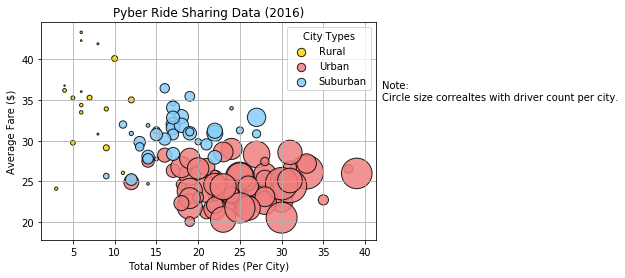

In [15]:
# Obtain the x and y coordinates for each of the three city types
urban_cities = urban_rides.groupby("city")
urban_avgfare = urban_cities["fare"].mean()
urban_tot = urban_cities["city"].count()
u_driver_count = urban_cities["driver_count"].sum()

suburban_cities = suburban_rides.groupby("city")
suburban_avgfare = suburban_cities["fare"].mean()
suburban_tot = suburban_cities["city"].count()
s_driver_count = suburban_cities["driver_count"].sum()

rural_cities = rural_rides.groupby("city")
rural_avgfare = rural_cities["fare"].mean()
rural_tot = rural_cities["city"].count()
r_driver_count = rural_cities["driver_count"].sum()

# Build the scatter plots for each city types
plt.scatter(rural_tot, rural_avgfare, s=r_driver_count/2, marker="o", facecolors="gold", edgecolors="black", alpha=0.85, label="Rural")
plt.scatter(urban_tot, urban_avgfare, s=u_driver_count/2, marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.85, label="Urban")
plt.scatter(suburban_tot, suburban_avgfare, s=s_driver_count/2, marker="o", facecolors="lightskyblue", edgecolors="black", alpha=0.85, label="Suburban")

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
lgnd = plt.legend(title="City Types", loc="best")
lgnd.legendHandles[0]._sizes = [70]
lgnd.legendHandles[1]._sizes = [70]
lgnd.legendHandles[2]._sizes = [70]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correaltes with driver count per city.")

# Save Figure
plt.savefig("images/RideSharing.png", bbox_inches="tight")

In [13]:
# Show plot
plt.show()

## Total Fares by City Type

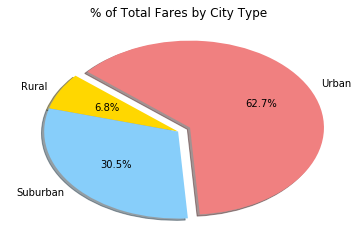

In [5]:
# Calculate Type Percents
perc = (combined_ride.groupby("type"))["fare"].sum()/combined_ride["fare"].sum()

#Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(perc, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("images/totalfares.png")

In [51]:
# Show Figure
plt.show()

## Total Rides by City Type

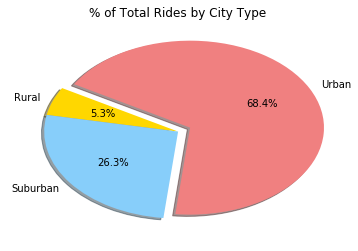

In [18]:
# Calculate Ride Percents
ride_percents = (combined_ride.groupby("type"))["ride_id"].count()/combined_ride["ride_id"].count()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(ride_percents, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("images/totalrides.png")

In [53]:
# Show Figure
plt.show()

## Total Drivers by City Type

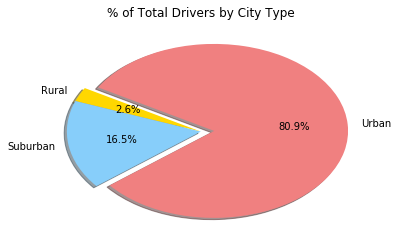

In [17]:
# Calculate Driver Percents
tot_drivers = (city_df.groupby("type"))["driver_count"].sum()/city_df["driver_count"].sum()

# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(tot_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("images/totaldrivers.png")

In [56]:
# Show Figure
plt.show()